In [152]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [153]:
data = pd.read_csv("env_random/env_random.csv")

In [154]:
data.keys()

Index(['timestamp', 'user_idx', 'item_idx', 'relevance_cont', 'relevance_int',
       'terminated', 'true_top'],
      dtype='object')

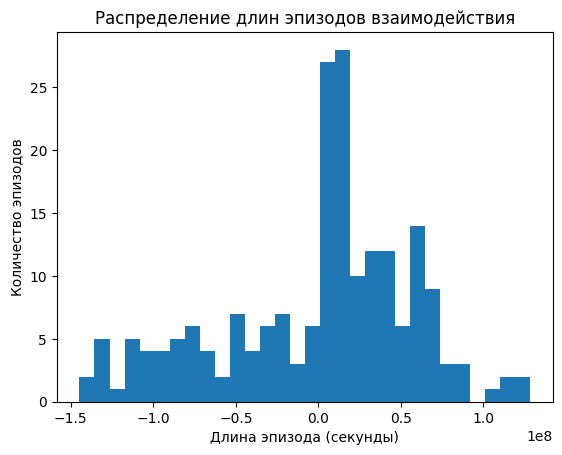

In [155]:

def calculate_interaction_lengths(data):
    # Группировка данных по пользователям и определение длины каждого эпизода взаимодействия
    data['timestamp'] = pd.to_datetime(data['timestamp']) 
    data.sort_values(['user_idx', 'timestamp'], inplace=True)  
    data['terminated_shift'] = data.groupby('user_idx')['terminated'].shift(-1)
    data['interaction_length'] = data.loc[data['terminated_shift'] == 1, 'timestamp'].diff()
    return data

def plot_interaction_lengths(data):
    # Построение графика распределения длин эпизодов взаимодействия
    data['interaction_length'] = data['interaction_length'].dt.total_seconds()
    plt.hist(data['interaction_length'].dropna(), bins=30)
    plt.title('Распределение длин эпизодов взаимодействия')
    plt.xlabel('Длина эпизода (секунды)')
    plt.ylabel('Количество эпизодов')
    plt.show()


inrs = calculate_interaction_lengths(data)
plot_interaction_lengths(inrs)


In [156]:
def calculate_interactions_per_episode(data):
    # Добавление столбца для обозначения начала нового эпизода
    data['new_episode'] = data['terminated_shift'].shift(1).fillna(0)
     # Преобразование типа данных столбца 'new_episode' в int
    data['new_episode'] = data['new_episode'].astype(int)

    # Создание столбца с номерами эпизодов для каждого пользователя
    data['episode_idx'] = data.groupby('user_idx')['new_episode'].cumsum()

    # Подсчет количества взаимодействий за каждый эпизод
    interactions_per_episode = data.groupby(['user_idx', 'episode_idx']).size().reset_index(name='interactions')

    return interactions_per_episode

def plot_interactions_per_episode(interactions_per_episode):
    # Построение гистограммы распределения количества взаимодействий за эпизод
    plt.hist(interactions_per_episode['interactions'], bins=30)
    plt.title('Распределение количества взаимодействий за эпизод')
    plt.xlabel('Количество взаимодействий за эпизод')
    plt.ylabel('Количество эпизодов')
    plt.show()

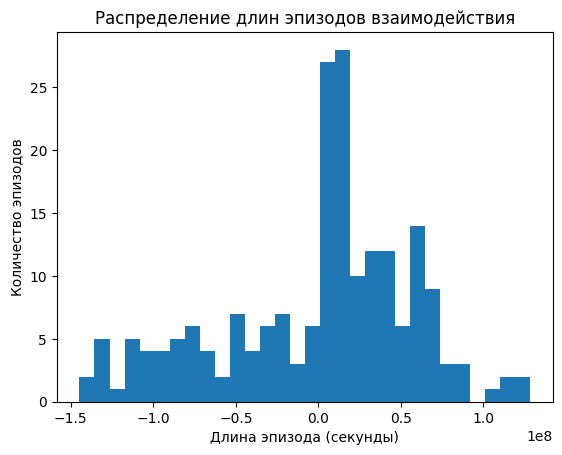

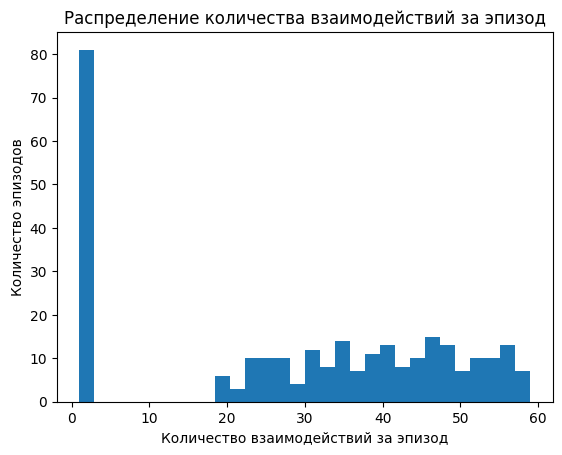

In [157]:

intrs = calculate_interaction_lengths(data)
interactions_per_episode = calculate_interactions_per_episode(intrs)
plot_interaction_lengths(intrs)
plot_interactions_per_episode(interactions_per_episode)  # Добавлен вызов новой функции

/tmp/ipykernel_3725957/3974827355.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['timestamp'] = pd.to_datetime(data['timestamp'])
/home/babycar/.local/lib/python3.10/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/tmp/ipykernel_3725957/3974827355.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

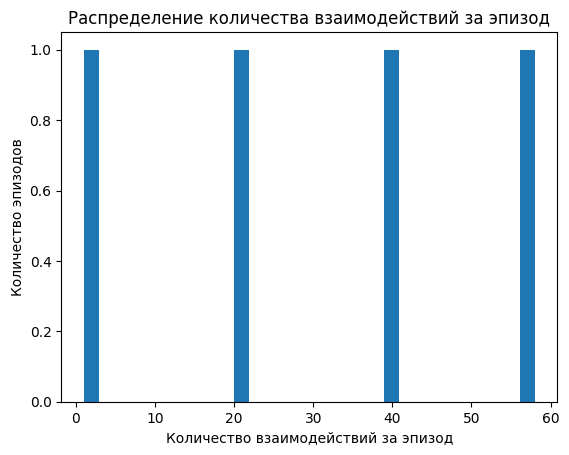

In [158]:

user = data[data['user_idx'] == 0]

intrs = calculate_interaction_lengths(user)
interactions_per_episode = calculate_interactions_per_episode(intrs)
#plot_interaction_lengths(intrs)
plot_interactions_per_episode(interactions_per_episode)  # Добавлен вызов новой функции

In [168]:
def plot_relevance_distribution(data, user_id):
    # Фильтрация данных для заданного пользователя
    data = data[data['user_idx'] == user_id]
    
    # Построение гистограммы распределения relevance_int
    plt.hist(data['relevance_int'].dropna(), bins=30)
    plt.title('Распределение relevance_int для пользователя {}'.format(user_id))
    plt.xlabel('relevance_int')
    plt.ylabel('Количество')
    plt.show()

def plot_item_distribution(data, user_id):
    # Фильтрация данных для заданного пользователя
    data = data[data['user_idx'] == user_id]
    data = data[data['relevance_int'] > 4]

    # Построение гистограммы распределения item_idx
    plt.hist(data['item_idx'].dropna(), bins=30)
    plt.title('Распределение item_idx для пользователя {}'.format(user_id))
    plt.xlabel('item_idx')
    plt.ylabel('Количество')
    plt.show()


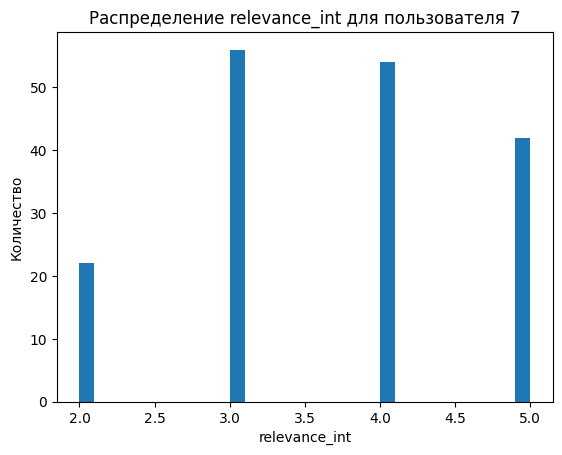

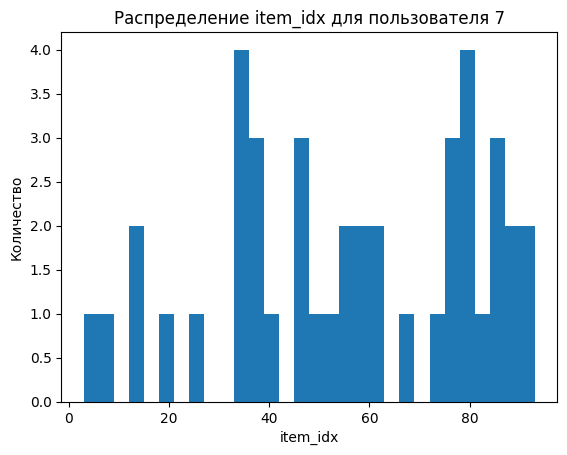

In [170]:
user_id = 7
plot_relevance_distribution(data, user_id)  # Добавлен вызов новой функции
plot_item_distribution(data, user_id)  # Добавлен вызов новой функции


In [167]:

user = data[data['user_idx'] == 0]

In [162]:
user

,timestamp,user_idx,item_idx,relevance_cont,relevance_int,terminated,true_top,terminated_shift,interaction_length,new_episode,episode_idx
5961,2022-09-04 01:50:48,0,61,0.555307,5,False,[11 23 66 65 35 64 32 75 31 52],False,NaN,0,0
5962,2022-09-04 07:02:48,0,82,0.615722,3,False,[99 74 58 50 43 42 32 30 29 26],False,NaN,0,0
5963,2022-09-04 13:23:48,0,27,0.591523,3,False,[99 55 11 73 12 17 61 22 58 57],False,NaN,0,0
5964,2022-09-04 22:47:48,0,74,0.579658,3,False,[99 43 67 66 63 57 56 50 48 44],False,NaN,0,0
5965,2022-09-05 06:27:48,0,9,0.906516,4,False,[49 98 78 29 30 33 42 46 50 81],False,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6808,2023-02-28 20:03:48,0,4,0.921866,5,False,[49 78 27 28 29 31 71 69 34 67],False,NaN,0,2
6809,2023-03-01 00:14:48,0,87,0.529886,4,False,[49 79 77 22 51 24 73 25 26 30],False,NaN,0,2
6810,2023-03-01 07:00:48,0,81,0.940981,4,False,[49 44 69 67 65 64 63 60 58 48],False,NaN,0,2
6811,2023-03-01 10:34:48,0,81,0.940980,5,False,[99 42 56 29 76 30 74 32 43 81],True,3699780.0,0,2
